### Importing necessary libraries 📙

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

#display all columns of the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("../data/train.csv")

In [3]:
df.shape

(1460, 81)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Lets start the EDA 👨‍🍳
### Our target variable is "SalePrice" 🎯

#### Missing values ❓

In [5]:
features_with_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1]


In [6]:
features_with_nan

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [7]:
for feature in features_with_nan:
    print(f"{np.round(df[feature].isnull().mean(),3)} % of missing {feature} values")

0.177 % of missing LotFrontage values
0.938 % of missing Alley values
0.005 % of missing MasVnrType values
0.005 % of missing MasVnrArea values
0.025 % of missing BsmtQual values
0.025 % of missing BsmtCond values
0.026 % of missing BsmtExposure values
0.025 % of missing BsmtFinType1 values
0.026 % of missing BsmtFinType2 values
0.473 % of missing FireplaceQu values
0.055 % of missing GarageType values
0.055 % of missing GarageYrBlt values
0.055 % of missing GarageFinish values
0.055 % of missing GarageQual values
0.055 % of missing GarageCond values
0.995 % of missing PoolQC values
0.808 % of missing Fence values
0.963 % of missing MiscFeature values


### Relatioship of missing values with the target variable(SalePrice) 📊

In [ ]:
for feature in features_with_nan:
    # in each iteration new copy is created
    data = df.copy()

    # in each iteration we create new column with name
    #  'feature' having '1' for null and '0' for not null value
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # group by '1' or '0' in the feature and plot
    # their median price
    data.groupby(feature)['SalePrice'].median().plot.bar()
    
    plt.title(feature)
    plt.show()


In [9]:
print('ID of Houses',len(df.Id))

ID of Houses 1460


### Types of features
- Numerical features
- Categorical features


#### Numerical features

In [10]:
# store the numerical features in the variable. If the
#  column has datatype as object then dont select it.
numerical_features = [
    feature for feature in df.columns if df[feature].dtype != 'O']

print("Number of numerical features:", len(numerical_features))
df[numerical_features].head()


Number of numerical features: 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


### Temporal variable
Variables which changes with the time like the datetime.

In [11]:
# extrac the features having 'Yr' or 'Year' in them
year_feature = [feature for feature in df.columns if 'Yr' in feature or 'Year' in feature] 
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

### 'YrSold' vs 'SalePrice' 📈

Text(0.5, 1.0, 'Median House Price vs Year Sold')

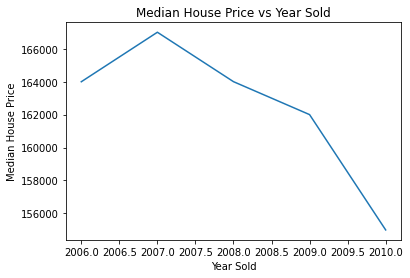

In [12]:
# groupby with 'YrSold' and take median of the SalePrice of that group.
df.groupby("YrSold")['SalePrice'].median().plot()

plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title('Median House Price vs Year Sold')

### Compare all year features with 'SalePrice'

In [ ]:
for feature in year_feature:
    data = df.copy()
    
    # we need to take difference of 'YrSold' thats
    # why we use feature != 'YrSold'
    if feature != 'YrSold':
        data[feature] = data['YrSold']-data[feature]
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel("SalePrice")
        plt.show()

### Types of Numerical Variables
 1. Discrete Variables
 2. Continuous Variables

In [14]:
# if the unique values in the feature is less than threshold=25 
# than consider that feature as discrete feature. 
discrete_features = [feature for feature in numerical_features if len(
    df[feature].unique()) < 25 and feature not in year_feature + ['Id']]

print(f"Discrete Variable Count: {len(discrete_features)}")

Discrete Variable Count: 17


### Discrete features vs SalePrice

In [ ]:
for feature in discrete_features:
    data = df.copy()

    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(feature)
    plt.show()

#### Continous features

In [21]:
# we not take the year_features and ['Id'] in the
# continous_features because we dont need them  
continous_features = [
    feature for feature in numerical_features
    if feature not in discrete_features + year_feature + ['Id']]

print(f"Continous features are : {len(continous_features)}")

Continous features are : 16


#### Continous_feature vs SalePrice

Notice that the distribution is not normally distributed some are *right skewed*. To properly analyze the data we need to convert these into  **log normal distributions**.

In [ ]:
for feature in continous_features:
    data = df.copy()

    # for continous data we normally plot histogram 
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

#### Converting the above continous data distributions to **log normal distributions**

In [ ]:
for feature in continous_features:
    data = df.copy()

    # because log of zero is undefined so skip it
    if 0 not in data[feature].unique():
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])

        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()


#### Outlier detection
Box plot - for continous data only.

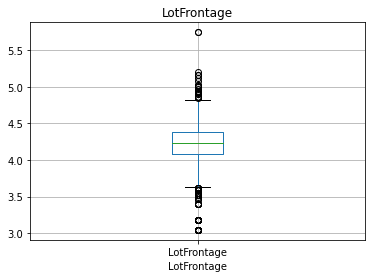

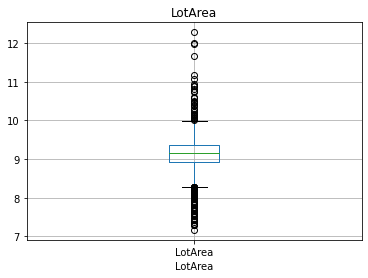

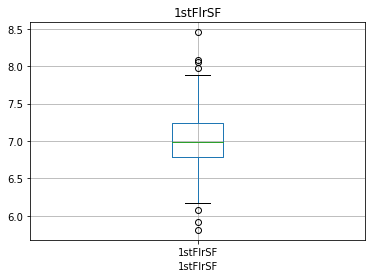

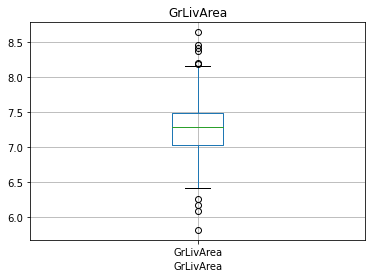

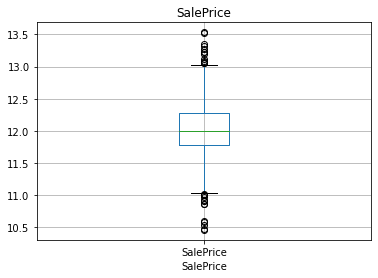

In [30]:
for feature in continous_features:
    data = df.copy()

    if 0 not in df[feature].unique():
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.xlabel(feature)
        plt.title(feature)
        plt.show()


#### Categorical features

In [32]:
categorical_features = [
    feature for feature in df.columns if df[feature].dtype == 'O']
print(f"Categorical features: {len(categorical_features)}")


Categorical features: 43


In [ ]:
df[categorical_features].head()

#### Cardinality of each categorical feature
Here we'll see that each feature has how much number of categories.

In [35]:
for feature in categorical_features:
    print(f"{feature} - {len(df[feature].unique())}")

MSZoning - 5
Street - 2
Alley - 3
LotShape - 4
LandContour - 4
Utilities - 2
LotConfig - 5
LandSlope - 3
Neighborhood - 25
Condition1 - 9
Condition2 - 8
BldgType - 5
HouseStyle - 8
RoofStyle - 6
RoofMatl - 8
Exterior1st - 15
Exterior2nd - 16
MasVnrType - 5
ExterQual - 4
ExterCond - 5
Foundation - 6
BsmtQual - 5
BsmtCond - 5
BsmtExposure - 5
BsmtFinType1 - 7
BsmtFinType2 - 7
Heating - 6
HeatingQC - 5
CentralAir - 2
Electrical - 6
KitchenQual - 4
Functional - 7
FireplaceQu - 6
GarageType - 7
GarageFinish - 4
GarageQual - 6
GarageCond - 6
PavedDrive - 3
PoolQC - 4
Fence - 5
MiscFeature - 5
SaleType - 9
SaleCondition - 6


#### Categorical features vs 'SalePrice'

In [ ]:
for feature in categorical_features:

    data = df.copy()

    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(feature)
    plt.show()